In [1]:
import numpy as np
import operator
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
sports = pd.read_csv("Sports_and_Outdoors.csv")
sports.drop(['verified', 'vote'], axis = 1 , inplace = True)
sports = sports.sort_values('date', ascending = False)
sports

C:\Users\jainm\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3397: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


rating      reviewerID  product_id        date
12968859       3   AAL07KPFE0VFI  B01HIT0QDG  1538697600
12969474       5  A39ANO7WWQ9PE8  B01HJA3STS  1538697600
12969475       5   A4HCTG3TV7UPM  B01HJA3STS  1538611200
12969105       1  A30DF0WFD9U1PT  B01HIY7NPU  1538611200
12965742       5  A2WCAIO2XACZ01  B01HGSLB6K  1538611200
...          ...             ...         ...         ...
9584735        5  A2GNKMMYQHOA3F  B00000IAYQ   943660800
8352           4  A1S9MLLFC314RV  B00000DGU5   943488000
9402138        5  A20C7MVZWY25HD  B000003CAK   943315200
9402149        4   AIVVQDJEHBW2X  B000004BGT   935971200
9402155        5   A4407TRBW9R3A  B00000A4XZ   926121600

[12969732 rows x 4 columns]

In [3]:
products = list(sports['product_id'].unique())
users = list(sports['reviewerID'].unique())
print(len(products), len(users))

957764 6703391


In [4]:
all_products = defaultdict(dict)
for ind in sports.itertuples():
    all_products[ind.product_id][ind.reviewerID] = ind.rating
all_products = dict(all_products)

In [5]:
all_users = defaultdict(dict)
for ind in sports.itertuples():
    all_users[ind.reviewerID][ind.product_id] = ind.rating
all_users = dict(all_users)

In [6]:
new_all = defaultdict(dict)
for i, val in all_products.items():
    if len(val) > 1:
        new_all[i] = val.copy()
new_all = dict(new_all)

In [7]:
all_products = new_all.copy()
print(len(all_products))

574775


In [8]:
epsilon = 1e-6
normalized_products = defaultdict(dict)
for i, val in all_products.items() :
    normalized_products[i] = val.copy()
for i, val in normalized_products.items():
    values = list(val.values())
    mean_val = np.mean(values)
    for j in val:
        val[j] -= mean_val
normalized_products

defaultdict(dict,
            {'B01HIT0QDG': {'AAL07KPFE0VFI': -0.75,
              'A3FVSZUAV37MYM': 0.25,
              'A9N0H263FTMP2': -1.75,
              'A3VICTPA1254V7': 1.25,
              'AID54S9490JRD': -0.75,
              'A28RGWVQ77RSCX': 0.25,
              'A184ZR5Z923OYS': 1.25,
              'A3G9K09JKQR69T': 0.25},
             'B01HJA3STS': {'A39ANO7WWQ9PE8': 1.5499999999999998,
              'A4HCTG3TV7UPM': 1.5499999999999998,
              'A2TLAVOA45JH5T': -0.4500000000000002,
              'A1ALUMXSAKXQLH': -1.4500000000000002,
              'A21T7Y9EPNOMG7': -0.4500000000000002,
              'A126BRMW78ROR0': -2.45,
              'A26PTAUR76S28T': -2.45,
              'A1IR9J826KA976': -1.4500000000000002,
              'A1I631H77SLWZS': -0.4500000000000002,
              'A2SPD70RUUBG8K': -0.4500000000000002,
              'A1B5K4XSSEFTKY': 1.5499999999999998,
              'A37LGXSJ5IFTW4': 1.5499999999999998,
              'A13ROV5YCA6TCX': 1.549999999999

In [9]:
magnitudes= {}
 
for i in normalized_products:
    values = list(normalized_products[i].values())
    magnitudes[i] = np.sqrt(np.sum(np.square(values)))
magnitudes

{'B01HIT0QDG': 2.7386127875258306,
 'B01HJA3STS': 6.24099351065197,
 'B01HIY7NPU': 3.6514837167011076,
 'B01HGSLB6K': 2.174229226018436,
 'B01HFW0W1C': 8.943636640854566,
 'B01HFNDVJQ': 5.908391567007971,
 'B01HF8PXJM': 3.5956322710437774,
 'B01HCKR9ZE': 19.866522100282445,
 'B01HDTN142': 5.560275772537426,
 'B01HF5DT1Y': 7.340905181848414,
 'B01H7X5YYY': 18.775218867896456,
 'B01H9A0U4E': 17.501173669563038,
 'B01HCRWLBO': 3.3166247903554,
 'B01HGWE1KE': 8.1117199162693,
 'B01HHB2HK0': 21.0676565817405,
 'B01HFEJUHC': 8.2644955558372,
 'B01HC7WUHE': 0.0,
 'B01HE0PMFQ': 12.937483760599543,
 'B01HIUTJC4': 4.47213595499958,
 'B01HC2YSJ2': 11.883772284752306,
 'B01HHWC1BY': 4.0824829046386295,
 'B01HE3WIQY': 4.577116996538323,
 'B01HB4UPO8': 10.716440886001187,
 'B01HEGK5U2': 7.486974991313111,
 'B01HBWQYZO': 1.4142135623730951,
 'B01HGN44QO': 8.29019135649309,
 'B01HHX6Z8S': 5.491812087098392,
 'B01HIWLV6E': 4.110960958218893,
 'B01H7HOS2O': 27.95243212206161,
 'B01HH19KZ0': 4.8710648453

In [10]:
user = sports['reviewerID'].value_counts().idxmax()
sample_user = user
rest = list(set(all_products.keys()) - set(all_users[sample_user]))
random_1000 = np.random.choice(rest, size = 5000)
sample_user

'A3OXHLG6DIBRW8'

In [11]:
random_1000

array(['B00FWQC26C', 'B016J7UQH4', 'B0001DZ4M0', ..., 'B00KEJ1QLE',
       'B0016C38SM', 'B0018BLH3E'], dtype='<U10')

In [12]:
compare_with = list(all_users[sample_user])
compare_with

['B00DMWDAT6',
 'B004NKZ9V8',
 'B018ONREEE',
 'B00FPQR5S4',
 'B018ONRLP6',
 'B004M7U1JW',
 'B01EK72LTQ',
 'B01EK72PCY',
 'B01DBZQBCG',
 'B00PB7HP9G',
 'B00UAM0MFG',
 'B00NAG4WX2',
 'B0185PBCSU',
 'B01DGD64N4',
 'B00X9ET4M4',
 'B00X9ET58W',
 'B007K813C4',
 'B0179MLBCM',
 'B00ULAFQT4',
 'B01E74KGTO',
 'B01DGDW2BW',
 'B01BE8JENK',
 'B01BE8JBL0',
 'B019N9WTRU',
 'B01GJ3VBVI',
 'B01E1CWQEU',
 'B00Z1PJLFE',
 'B019N9WK2O',
 'B01C70M77E',
 'B01C73SKTK',
 'B000MF63M2',
 'B0012SPEV4',
 'B01AC4U4NG',
 'B01BFYA6G2',
 'B01862OHBQ',
 'B016CZ6UQO',
 'B01B1TBBLA',
 'B00XPJX5SW',
 'B01B49677U',
 'B01B1TBFDO',
 'B00AVBC6W8',
 'B018UVLL9E',
 'B014IOURFQ',
 'B019DKUC3C',
 'B014IOURBK',
 'B014IOURF6',
 'B0197MJII6',
 'B00WZA9XZG',
 'B00GITR6UY',
 'B00OGMRPAG',
 'B0105TKKQO',
 'B00T9N2Z8O',
 'B007PALJ5S',
 'B015MQTV24',
 'B00AA4I40Y',
 'B00IIF6POE',
 'B00NACBGDK',
 'B00WAIM22O',
 'B00LQF9DK6',
 'B00ZJLA96A',
 'B00UFMQQQA',
 'B0068BF8AM',
 'B00ZD3HNHC',
 'B00SNBQ49E',
 'B00WF72PKO',
 'B00V97YCLQ',
 'B005S75K

In [13]:
# user has rated for compare_with products 
# we we want to find prediction for random_1000 products
prediction_dict = dict()

In [14]:
for item in random_1000:
    sine, calc = dict(), []
    for rated in compare_with:
        if rated not in magnitudes:
            continue
        coeff = 0
        for user in normalized_products[item]:
            if user not in normalized_products[rated]:
                continue
            coeff += normalized_products[item][user] * normalized_products[rated][user]
        if magnitudes[rated] == 0 and magnitudes[item] == 0:
            sine[rated] = 1
        elif magnitudes[rated] == 0 or magnitudes[item] == 0:
            sine[rated] = 0
        else:
            sine[rated] = coeff / (magnitudes[rated] * magnitudes[item])

    coeffs = []

    sorted_sine = dict(
        sorted(sine.items(), key=operator.itemgetter(1), reverse=True))
    maxrange = min(len(sorted_sine.values()), 100)
    for i in sine:
        if sine[i] <= 0:
            continue
        calc.append(sine[i] * all_users[sample_user][i])
        coeffs.append(sine[i])
        maxrange -= 1
        if maxrange == 0:
            break
    if len(coeffs) == 0:
        continue
    prediction_dict[item] = sum(calc) / sum(coeffs)

    if prediction_dict[item] <= 0:
        print(sum(calc))
        print(sum(coeffs))
        print()


In [15]:
prediction_dict

{'B00FWQC26C': 4.857142857142857,
 'B016J7UQH4': 4.857142857142857,
 'B00HUSI3CW': 4.857142857142857,
 'B001AZME8K': 4.857142857142857,
 'B00AU6CYSA': 5.0,
 'B013SZTHVG': 4.999999999999999,
 'B00C2Q38KY': 4.0,
 'B005I6T5UW': 4.857142857142857,
 'B000BV5XR8': 4.999999999999999,
 'B00MAZN96K': 4.857142857142857,
 'B00OOZYKHQ': 4.857142857142857,
 'B01FX18S9A': 4.706153646005965,
 'B00ZS41SKE': 5.0,
 'B001EO2FMM': 4.999999999999999,
 'B00EGS7OA6': 4.857142857142857,
 'B0051DVTJC': 4.189662628162804,
 'B0065V3XXE': 4.857142857142857,
 'B004UI9FZO': 4.0,
 'B00FT9RQFE': 4.857142857142857,
 'B00FYIV0LQ': 4.857142857142857,
 'B004532G9Q': 4.413185584926035,
 'B00AFZDZ7U': 4.857142857142857,
 'B001MS0EMS': 2.9999999999999996,
 'B00DG9KIE0': 5.0,
 'B00ENP8LUO': 4.857142857142857,
 'B00I3RHPI2': 4.857142857142857,
 'B00WRA9ZW0': 4.857142857142857,
 'B00IVK45W0': 4.857142857142857,
 'B00019NPFM': 4.857142857142857,
 'B00FTABL1I': 5.0,
 'B00GAA4KIC': 5.0,
 'B00MVRQQG2': 4.0,
 'B00B96J7FS': 4.857142

In [16]:
cnt = 0
for i in prediction_dict.values() : 
    if i  >= 5 :
        cnt += 1
print(cnt)

313


In [17]:
#now we will pick top 100 items to recommend to user
prediction_df = pd.DataFrame(prediction_dict.items() , columns = ["product_id" , "predicted_rating"])
prediction_df

product_id  predicted_rating
0     B00FWQC26C          4.857143
1     B016J7UQH4          4.857143
2     B00HUSI3CW          4.857143
3     B001AZME8K          4.857143
4     B00AU6CYSA          5.000000
...          ...               ...
1887  B01A61TB3O          4.857143
1888  B01COXPYOW          4.857143
1889  B003OC9PNO          4.857143
1890  B0031QKY0Q          4.857143
1891  B00KEJ1QLE          4.857143

[1892 rows x 2 columns]

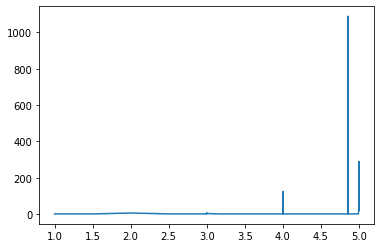

In [18]:
histogram = dict()
for i in range(len(prediction_df)) :
    a = prediction_df.iloc[i]
    if a['predicted_rating'] not in histogram :
        histogram[a['predicted_rating']] = 1
    else : 
        histogram[a['predicted_rating']] += 1
bar = sorted(histogram.items())
x , y = zip(*bar)
plt.plot(x,y)
plt.show()

In [19]:
results = prediction_df.sort_values(by = "predicted_rating" , ascending = False)
recommended_products = list()
for i in range(1000) : 
    recommended_products.append(results.iloc[i]['product_id'])
print("Top 100 Recommended products for user " + str(sample_user) + " -")
print(recommended_products)
    

Top 100 Recommended products for user A3OXHLG6DIBRW8 -
['B00VW4MWEA', 'B004BR75IS', 'B00W22G0GC', 'B001CE8J7E', 'B00OEAK87M', 'B001449GLU', 'B00Y858Z4Q', 'B00FX6NC3I', 'B0182SGRV2', 'B0047DBTD8', 'B00AMNM5TY', 'B009DM04NO', 'B002J97EGS', 'B00WO4ZEDS', 'B0158QP2EY', 'B000BR3ZPE', 'B001OPGUT0', 'B0092MQN8K', 'B00HARJCXM', 'B00F5OZUFQ', 'B008FB7OYQ', 'B001JJ4FWK', 'B005Z849BS', 'B001FDO1LU', 'B01EUUFGHM', 'B005WUDPUA', 'B003K2BZ0E', 'B006RNEOTW', 'B00YZ0SOOA', 'B002NU66FI', 'B014TI5PEO', 'B00JO2M882', 'B000PL3MEU', 'B008HUKNZW', 'B00HA5FU4O', 'B005705VBQ', 'B00LFIQQUY', 'B001R301XU', 'B00911PB6C', 'B019GHENSW', 'B01D0CW34U', 'B01H85ETNS', 'B00SX1C4X4', 'B00WT8U7FY', 'B0000TIK3U', 'B00L7U1NTE', 'B001HN5GZS', 'B01EFBH7RI', 'B00BJNV37G', 'B00K0L5UB8', 'B005OSE5RC', 'B00CKIMS1Y', 'B000UW1NGS', 'B019BGY43M', 'B0092HNUM2', 'B019DG5JP2', 'B005HTUSDS', 'B011N5EFCY', 'B00MR8VC8W', 'B00KXVJIAO', 'B000XABUBA', 'B003AO109I', 'B00Q39KOQC', 'B00VU2AZOI', 'B00KKZJAGU', 'B00101ZSSM', 'B004O0DQX0', 'B00S0